## By Rajlakshmi Gogoi

# Task no. 6 of Data Science: Prediction using Decision Tree Algorithm

importing the necessary libraries






In [73]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

iris dataset

In [74]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


To check the relationships seaborn.seaborn is used providing a function called pairplot that plot pairwise relationships in a dataset. The whole dataframe can be sent as the parameters so that it will check relationship for each column to other columns. Categorical color based on a certain column can also been given. To know whether there are outliers in our data or not hue can be given with Species as the parameter.


In [77]:
import seaborn as sns

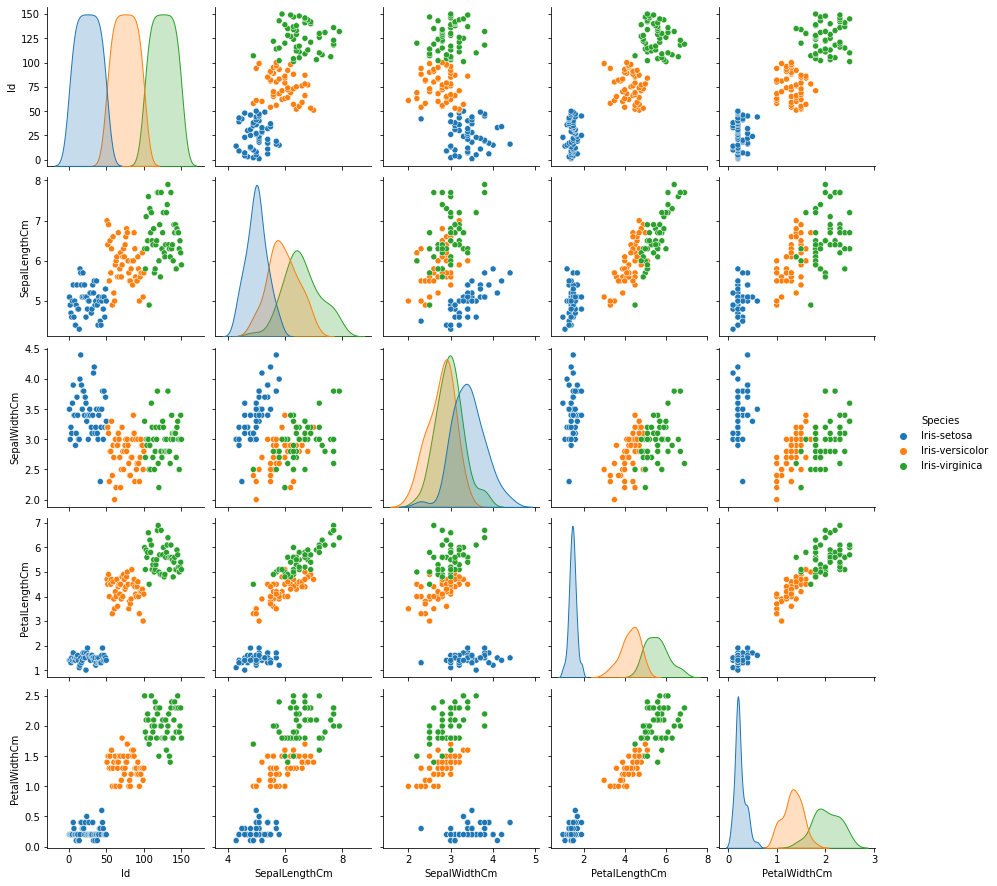

In [78]:
sns.pairplot(data, hue= 'Species')

The outliers present might be from wrong data or maybe it is really a data anomaly. It is assumed that it is just a data anomaly to avoid too much assumption.

Correlation Matrix

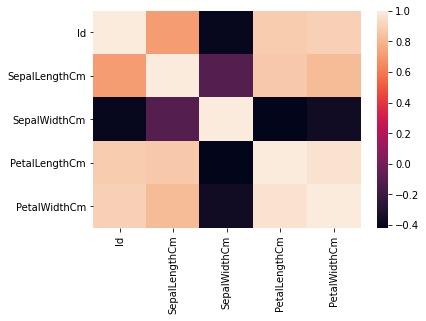

In [79]:
sns.heatmap(data.corr())

**Splitting The Dataset**

Now, the dataset is splitted into two parts, one is the target variable, which is "Species" in this case, and the other is the variables on which the target variable depends.

In [80]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y = data['Species'].values

In [81]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
import sklearn.metrics as metrics

Since there is only one dataset available the dataset is needed to be divided into training and test dataset manually. In order to do that,the train_test_split method from the scikit-learn can be used.  

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

The dataset is splitted into 80:20 for training and testing dataset. A random_state is defined equal to 1.

Creation of decision tree

In [83]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
d_tree.score(X_test,Y_test)

0.9666666666666667

accuracy = 96.66%

Testing

In [85]:
y_pred = d_tree.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


## **Visualizing the Tree**

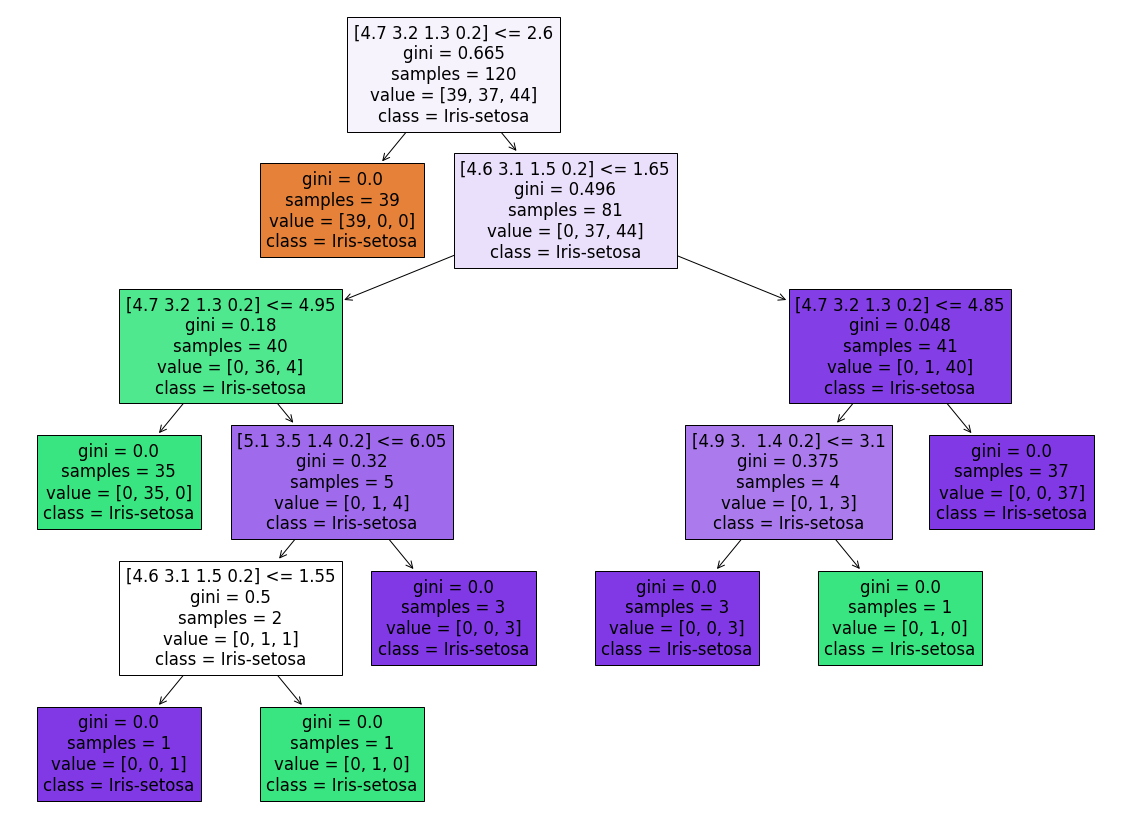

In [86]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(d_tree, 
                   feature_names=X,  
                   class_names=Y,
                   filled=True)

Creation of a Decision Tree classifier and visualizing it graphically.

## The End